# hepatitis adsgan stacking

Training on hepatitis dataset using adsgan model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "adsgan"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [3]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-16T08:42:30.995786+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 13%|█▎        | 1299/10000 [10:11<1:08:14,  2.13it/s]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-16T08:52:47.496499+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


  7%|▋         | 699/10000 [18:28<4:05:46,  1.59s/it] 


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    42       1   33      2               2          1          2   
1576    47       2   31      1               1          1          2   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    58       1   34      2               1          2          1   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-16T09:11:20.196490+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▌         | 549/10000 [36:47<10:33:28,  4.02s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    47       2   30      1               1          1          1   
2389    58       2   33      2               1          2          2   
2561    49       2   28      1               1          1          1   
5344    41       2   32      1               1          2          1   
3690    57       1   24      2               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
3772    37       2   22      1               2          1          2   
5191    53       2   23      2               1          1          2   
5226    35       2   28      1               2          1          1   
5390    50       2   23      1               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 2          

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-16T09:48:13.858627+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 399/10000 [48:52<19:36:14,  7.35s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    59       2   22      1               2          1          1   
4720    50       1   29      1               1          1          2   
474     41       1   31      2               1          1          2   
4874    36       2   33      1               1          2          1   
2391    33       2   22      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
5734    32       1   28      1               2          1          1   
5191    53       2   23      2               1          1          2   
5390    50       2   23      1               2          2          1   
860     52       2   28      2               2          2          1   
7270    42       1   33      2               1          1          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 1          

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-16T10:37:15.984861+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  3%|▎         | 299/10000 [1:29:09<48:12:50, 17.89s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     58       2   32      1               1          2          1   
558      34       1   25      1               2          1          1   
6959     39       1   23      2               1          1          1   
20195    58       2   28      2               2          2          1   
20145    50       2   27      2               2          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
11964    47       1   22      2               1          1          1   
21575    55       1   32      2               1          2          2   
5390     50       2   23      1               2          2          1   
860      52       2   28      2               2          2          1   
15795    38       1   24      1               1          2          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [13]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [14]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-16T12:06:48.849332+0200][13248][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▍         | 499/10000 [2:22:57<45:21:53, 17.19s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     57       2   32      2               2          1          2   
11634    48       2   27      1               2          1          1   
20750    49       1   31      2               2          1          2   
3329     41       1   33      2               1          1          1   
18793    57       1   29      1               2          2          1   
...     ...     ...  ...    ...             ...        ...        ...   
12669    59       2   23      2               1          1          2   
13349    43       1   30      2               1          2          2   
6775     34       1   32      2               2          1          2   
2245     56       2   35      1               2          2          2   
17180    54       2   33      2               1          1          1   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [4]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016619,0.002589,0.983381,0.002589
1,pca_eigval_diff,u,0.009310,NaN,0.990690,NaN
2,pca_eigvec_ang,u,0.390146,NaN,0.875813,NaN
3,avg_cio,u,0.272459,0.079471,0.272459,0.079471
4,corr_mat_diff,u,0.817703,NaN,0.997986,NaN
5,mutual_inf_diff,u,1.512391,NaN,0.996275,NaN
6,ks_tvd_stat,u,0.057137,0.007173,0.942863,0.007173
7,frac_ks_sigs,u,0.448276,NaN,0.551724,NaN
8,avg_h_dist,u,0.006092,0.001832,0.993908,0.001832
9,avg_pMSE,u,0.009743,0.000209,0.961029,0.000837


# Eval on syn_v2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018207,0.002588,0.981793,0.002588
1,pca_eigval_diff,u,0.006957,NaN,0.993043,NaN
2,pca_eigvec_ang,u,0.329003,NaN,0.895275,NaN
3,avg_cio,u,0.268412,0.078716,0.268412,0.078716
4,corr_mat_diff,u,0.745480,NaN,0.998164,NaN
5,mutual_inf_diff,u,1.544541,NaN,0.996196,NaN
6,ks_tvd_stat,u,0.066451,0.007758,0.933549,0.007758
7,frac_ks_sigs,u,0.620690,NaN,0.379310,NaN
8,avg_h_dist,u,0.007112,0.002172,0.992888,0.002172
9,avg_pMSE,u,0.011416,0.000368,0.954334,0.001471


# Eval on syn_v3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.041089,0.002588,0.958911,0.002588
1,pca_eigval_diff,u,0.007172,NaN,0.992828,NaN
2,pca_eigvec_ang,u,0.298832,NaN,0.904879,NaN
3,avg_cio,u,0.196990,0.066971,0.196990,0.066971
4,corr_mat_diff,u,0.762542,NaN,0.998122,NaN
5,mutual_inf_diff,u,1.606593,NaN,0.996043,NaN
6,ks_tvd_stat,u,0.092881,0.011477,0.907119,0.011477
7,frac_ks_sigs,u,0.758621,NaN,0.241379,NaN
8,avg_h_dist,u,0.010525,0.003456,0.989475,0.003456
9,avg_pMSE,u,0.038312,0.001286,0.846751,0.005144


# Eval on syn_v4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.036314,0.002595,0.963686,0.002595
1,pca_eigval_diff,u,0.019073,NaN,0.980927,NaN
2,pca_eigvec_ang,u,0.408764,NaN,0.869886,NaN
3,avg_cio,u,0.161582,0.061635,0.161582,0.061635
4,corr_mat_diff,u,0.879884,NaN,0.997833,NaN
5,mutual_inf_diff,u,1.562374,NaN,0.996152,NaN
6,ks_tvd_stat,u,0.076007,0.009583,0.923993,0.009583
7,frac_ks_sigs,u,0.655172,NaN,0.344828,NaN
8,avg_h_dist,u,0.007440,0.002327,0.992560,0.002327
9,avg_pMSE,u,0.032943,0.001068,0.868226,0.004272


# Eval on syn_v5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.055571,0.002587,0.944429,0.002587
1,pca_eigval_diff,u,0.022567,NaN,0.977433,NaN
2,pca_eigvec_ang,u,0.413299,NaN,0.868443,NaN
3,avg_cio,u,0.053748,0.036936,0.053748,0.036936
4,corr_mat_diff,u,0.919536,NaN,0.997735,NaN
5,mutual_inf_diff,u,1.672745,NaN,0.995880,NaN
6,ks_tvd_stat,u,0.111116,0.011073,0.888884,0.011073
7,frac_ks_sigs,u,0.931034,NaN,0.068966,NaN
8,avg_h_dist,u,0.014317,0.004089,0.985683,0.004089
9,avg_pMSE,u,0.062540,0.001725,0.749841,0.006901


# Eval on synth_only_stack

In [13]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [14]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.051886,0.002599,0.948114,0.002599
1,pca_eigval_diff,u,0.020026,NaN,0.979974,NaN
2,pca_eigvec_ang,u,0.356762,NaN,0.886439,NaN
3,avg_cio,u,0.203086,0.072232,0.203086,0.072232
4,corr_mat_diff,u,0.884414,NaN,0.997822,NaN
5,mutual_inf_diff,u,1.634610,NaN,0.995974,NaN
6,ks_tvd_stat,u,0.103299,0.011702,0.896701,0.011702
7,frac_ks_sigs,u,0.758621,NaN,0.241379,NaN
8,avg_h_dist,u,0.012263,0.004307,0.987737,0.004307
9,avg_pMSE,u,0.063041,0.001180,0.747837,0.004719


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.496390,0.217876,0.997122
res_stack_v1,0.434116,0.221387,0.972662
res_stack_v2,0.416968,0.214042,0.722302
res_stack_v3,0.437726,0.212175,0.943885
res_stack_v4,0.379964,0.209934,0.719424
res_stack_synth_only,0.390794,0.211577,0.745324


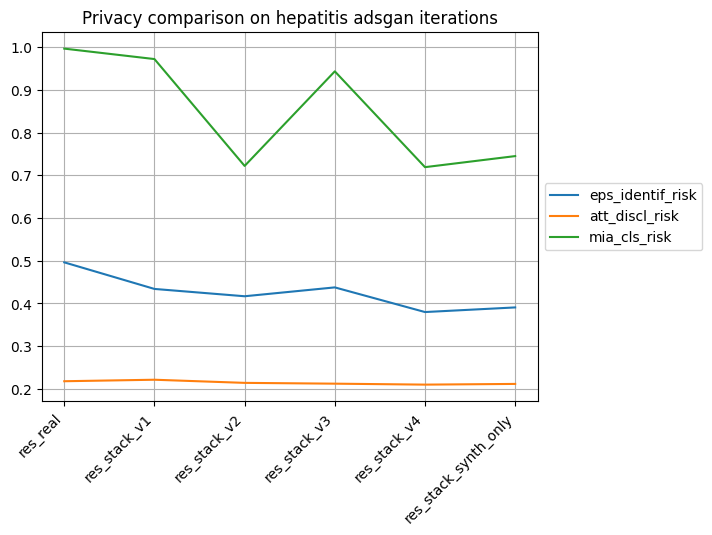

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,0.989768
res_stack_v1,1.011449
res_stack_v2,1.018638
res_stack_v3,1.018920
res_stack_v4,1.032521
res_stack_synth_only,1.029496


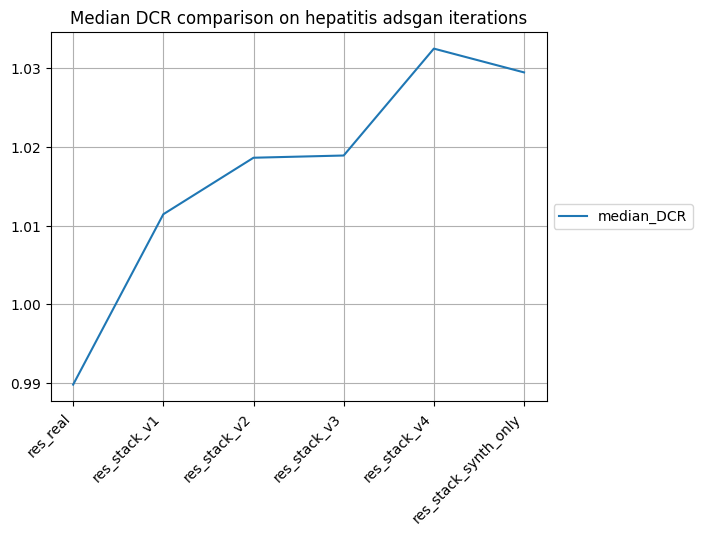

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.016619,0.009743,0.036793
res_stack_v1,0.018207,0.011416,0.035210
res_stack_v2,0.041089,0.038312,0.025957
res_stack_v3,0.036314,0.032943,0.019406
res_stack_v4,0.055571,0.062540,0.020766
res_stack_synth_only,0.051886,0.063041,0.025723


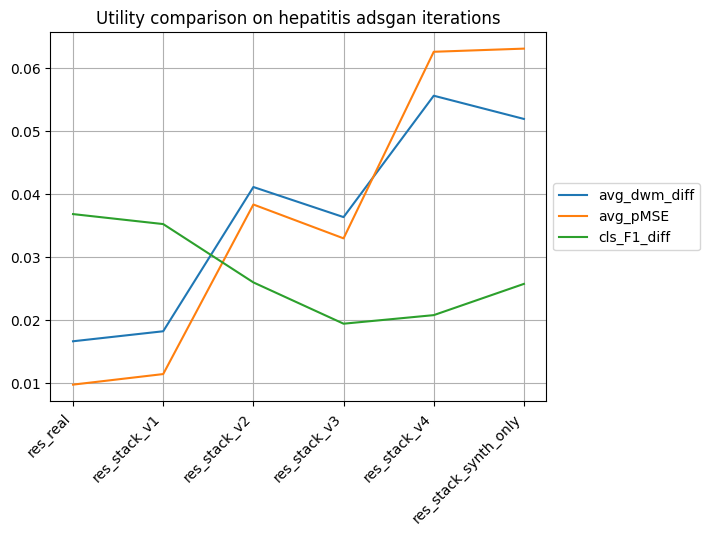

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.817703
res_stack_v1,0.745480
res_stack_v2,0.762542
res_stack_v3,0.879884
res_stack_v4,0.919536
res_stack_synth_only,0.884414


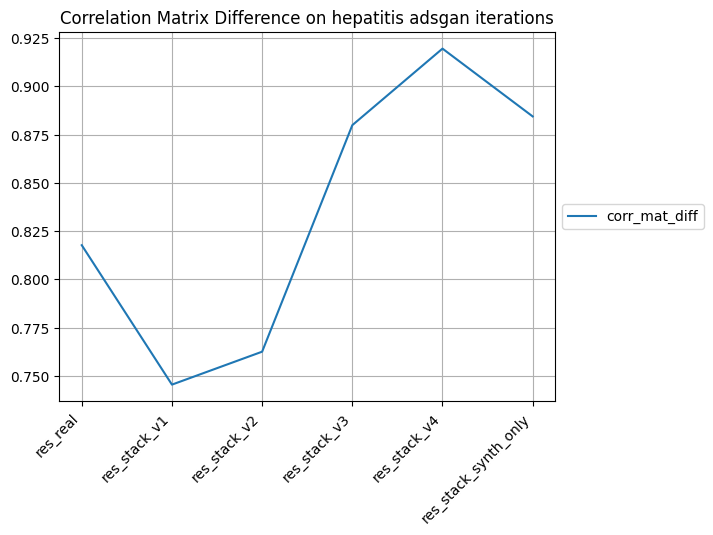

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.016619,0.009310,0.390146,0.272459,0.817703,1.512391,0.057137,0.448276,0.006092,0.009743,0.927906,-0.005173,0.525632,0.074910,0.036793,0.025271,0.0,0.496390,0.997122,0.217876
res_stack_v1,0.018207,0.006957,0.329003,0.268412,0.745480,1.544541,0.066451,0.620690,0.007112,0.011416,0.926758,-0.005720,0.557130,0.000511,0.035210,0.036101,0.0,0.434116,0.972662,0.221387
res_stack_v2,0.041089,0.007172,0.298832,0.196990,0.762542,1.606593,0.092881,0.758621,0.010525,0.038312,0.922166,-0.000261,0.539350,0.056558,0.025957,0.031588,0.0,0.416968,0.722302,0.214042
res_stack_v3,0.036314,0.019073,0.408764,0.161582,0.879884,1.562374,0.076007,0.655172,0.007440,0.032943,0.927890,-0.004317,0.567599,0.023075,0.019406,0.045126,0.0,0.437726,0.943885,0.212175
res_stack_v4,0.055571,0.022567,0.413299,0.053748,0.919536,1.672745,0.111116,0.931034,0.014317,0.062540,0.927351,-0.002352,0.595848,-0.006378,0.020766,0.046931,0.0,0.379964,0.719424,0.209934
res_stack_synth_only,0.051886,0.020026,0.356762,0.203086,0.884414,1.634610,0.103299,0.758621,0.012263,0.063041,0.926747,0.001419,0.578339,0.039952,0.025723,0.035199,0.0,0.390794,0.745324,0.211577


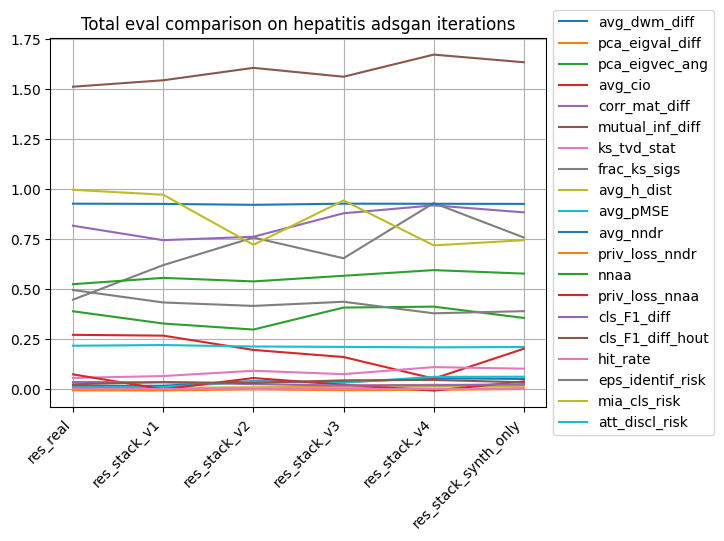

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.844495,0.736712
1,res_stack_v1,0.828040,0.757340
2,res_stack_v2,0.802739,0.785168
3,res_stack_v3,0.805195,0.759517
4,res_stack_v4,0.759038,0.798027
5,res_stack_synth_only,0.788139,0.788923


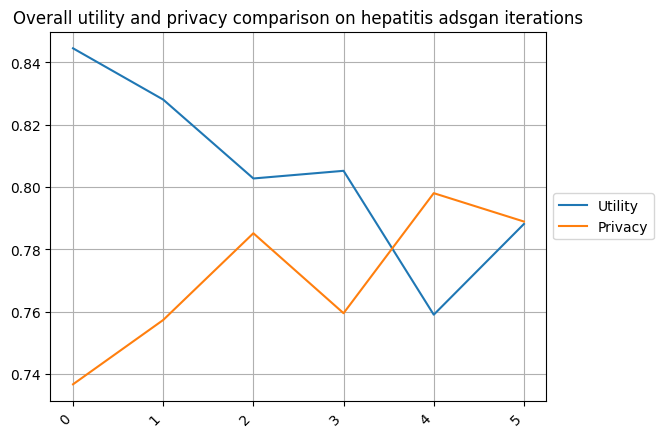

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hepatitis adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()